# Loading Data

In [9]:
from numbers import Number
from collections import defaultdict

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

import sina.datastores.sql as sina_sql
import sina.utils
from sina.datastore import create_datastore
from sina.visualization import Visualizer
from sina.model import Record, generate_record_from_json
import math
import statistics
import numpy as np

%matplotlib notebook

# Initialization
database = '../04_manage_data/data/ensembles_output.sqlite'
target_type = "csv_rec"
datastore = create_datastore(database)
recs = datastore.records
vis = Visualizer(datastore)
print("Sina is ready!")



# Baseline Initialization
database_baseline = '../01_baseline_simulation/baseline/data/baseline_output.sqlite'
datastore_baseline = create_datastore(database_baseline)
recs_baseline = datastore_baseline.records

val = recs_baseline.get('47bcda_0')
print(val.data.keys()) # since there are no embedded keys we can just use this
#print(val.curve_sets) # no curve sets



x_true = val.data['x_pos']['value']
y_true = val.data['y_pos']['value']
z_true = val.data['z_pos']['value']
time_true = val.data['time']['value']


# Numerical Resolution Initialization
database_num_res = '../01_baseline_simulation/num_res/data/num_res_output.sqlite'
datastore_num_res = create_datastore(database_num_res)
recs_num_res = datastore_num_res.records



Sina is ready!
dict_keys(['x_pos_initial', 'y_pos_initial', 'z_pos_initial', 'x_vel_initial', 'y_vel_initial', 'z_vel_initial', 'gravity', 'box_side_length', 'group_id', 'time', 'x_pos', 'y_pos', 'z_pos', 'x_vel_final', 'y_vel_final', 'z_vel_final', 'num_bounces'])


# Adding Data to Records

In [6]:
mean_rec = Record(id= "mean", type="summary")
recs.delete("mean")

x_temp = []
y_temp = []
z_temp = []

x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []

for i , t in enumerate(time_true):
    
    for rec in recs.get_all():

        x_pred = rec.data['x_pos']['value'][i]
        y_pred = rec.data['y_pos']['value'][i]
        z_pred = rec.data['z_pos']['value'][i]

        x_temp.append(x_pred)
        y_temp.append(y_pred)
        z_temp.append(z_pred)
        
        if i == len(time_true) - 1 :
            rec.add_data('x_pos_final', x_pred)
            rec.add_data('y_pos_final', y_pred)
            rec.add_data('z_pos_final', z_pred)
            recs.update(rec)
            
        
    x_mean.append(statistics.mean(x_temp))
    y_mean.append(statistics.mean(y_temp))
    z_mean.append(statistics.mean(z_temp))
    x_std.append(statistics.stdev(x_temp))
    y_std.append(statistics.stdev(y_temp))
    z_std.append(statistics.stdev(z_temp))
    
    x_temp = []
    y_temp = []
    z_temp = []

mean_rec.add_data('time',time_true)
mean_rec.add_data('x_pos_mean',x_mean)
mean_rec.add_data('y_pos_mean',y_mean)
mean_rec.add_data('z_pos_mean',z_mean)
mean_rec.add_data('x_pos_std',x_std)
mean_rec.add_data('y_pos_std',y_std)
mean_rec.add_data('z_pos_std',z_std)    

mean_rec.add_data('x_pos_mean_plus_std', [ x_mean[i] + x_std[i] for i in range (len (time_true))])
mean_rec.add_data('y_pos_mean_plus_std', [ y_mean[i] + y_std[i] for i in range (len (time_true))])
mean_rec.add_data('z_pos_mean_plus_std', [ z_mean[i] + z_std[i] for i in range (len (time_true))])
mean_rec.add_data('x_pos_mean_minus_std', [ x_mean[i] - x_std[i] for i in range (len (time_true))])
mean_rec.add_data('y_pos_mean_minus_std', [ y_mean[i] - y_std[i] for i in range (len (time_true))])
mean_rec.add_data('z_pos_mean_minus_std', [ z_mean[i] - z_std[i] for i in range (len (time_true))])

mean_rec.add_data('x_pos_mean_plus_2std', [ x_mean[i] + 2*x_std[i] for i in range (len (time_true))])
mean_rec.add_data('y_pos_mean_plus_2std', [ y_mean[i] + 2*y_std[i] for i in range (len (time_true))])
mean_rec.add_data('z_pos_mean_plus_2std', [ z_mean[i] + 2*z_std[i] for i in range (len (time_true))])
mean_rec.add_data('x_pos_mean_minus_2std', [ x_mean[i] - 2*x_std[i] for i in range (len (time_true))])
mean_rec.add_data('y_pos_mean_minus_2std', [ y_mean[i] - 2*y_std[i] for i in range (len (time_true))])
mean_rec.add_data('z_pos_mean_minus_2std', [ z_mean[i] - 2*z_std[i] for i in range (len (time_true))])

recs.insert(mean_rec) # need to update or else won't save!!!!!    
    

# Plotting Options

In [2]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
scalars= ["x_pos_final", "y_pos_final", "z_pos_final"]
parameters = ['x_pos_initial', 'y_pos_initial', 'z_pos_initial', 'x_vel_initial', 'y_vel_initial', 'z_vel_initial']
convergence=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
n_bins = int(math.sqrt(convergence[-1]))

# QoI transient data with uncertainty bounds

<IPython.core.display.Javascript object>


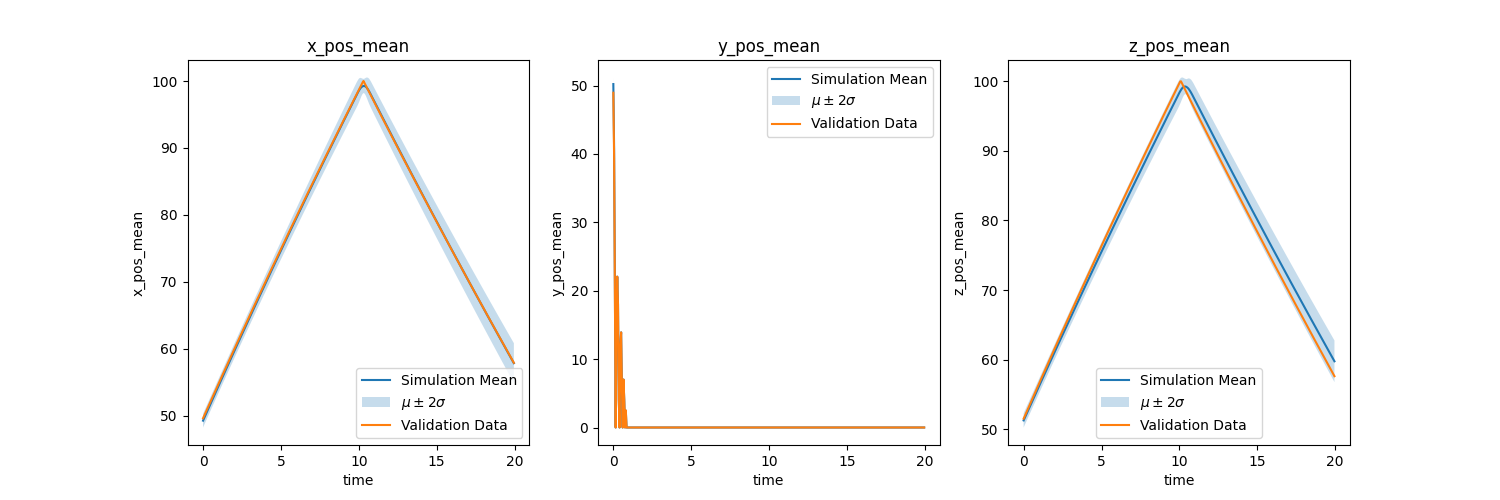

In [2]:
mean = recs.get('mean')
time = mean.data['time']['value']
x_pos_mean_plus_2std = mean.data['x_pos_mean_plus_2std']['value']
y_pos_mean_plus_2std = mean.data['y_pos_mean_plus_2std']['value']
z_pos_mean_plus_2std = mean.data['z_pos_mean_plus_2std']['value']

x_pos_mean_minus_2std = mean.data['x_pos_mean_minus_2std']['value']
y_pos_mean_minus_2std = mean.data['y_pos_mean_minus_2std']['value']
z_pos_mean_minus_2std = mean.data['z_pos_mean_minus_2std']['value']


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))



_ = vis.create_line_plot(fig=fig, ax=ax[0],x="time", y="x_pos_mean", title = "{y_name}", id_pool=['mean'])
_ = vis.create_line_plot(fig=fig, ax=ax[1],x="time", y="y_pos_mean", title = "{y_name}", id_pool=['mean'])
_ = vis.create_line_plot(fig=fig, ax=ax[2],x="time", y="z_pos_mean", title = "{y_name}", id_pool=['mean'])



ax[0].fill_between(time,x_pos_mean_plus_2std,x_pos_mean_minus_2std, alpha=0.25)
ax[1].fill_between(time,y_pos_mean_plus_2std,y_pos_mean_minus_2std, alpha=0.25)
ax[2].fill_between(time,z_pos_mean_plus_2std,z_pos_mean_minus_2std, alpha=0.25)

ax[0].plot(time_true, x_true)
ax[1].plot(time_true, y_true)
ax[2].plot(time_true, z_true)


ax[0].legend(labels=['Simulation Mean','$\mu \pm 2 \sigma$','Validation Data'])
ax[1].legend(labels=['Simulation Mean','$\mu \pm 2 \sigma$','Validation Data'])
ax[2].legend(labels=['Simulation Mean','$\mu \pm 2 \sigma$','Validation Data'])
fig.savefig("./images/QoIs_u_input.png")

# QoI point data violin and box plots

<IPython.core.display.Javascript object>


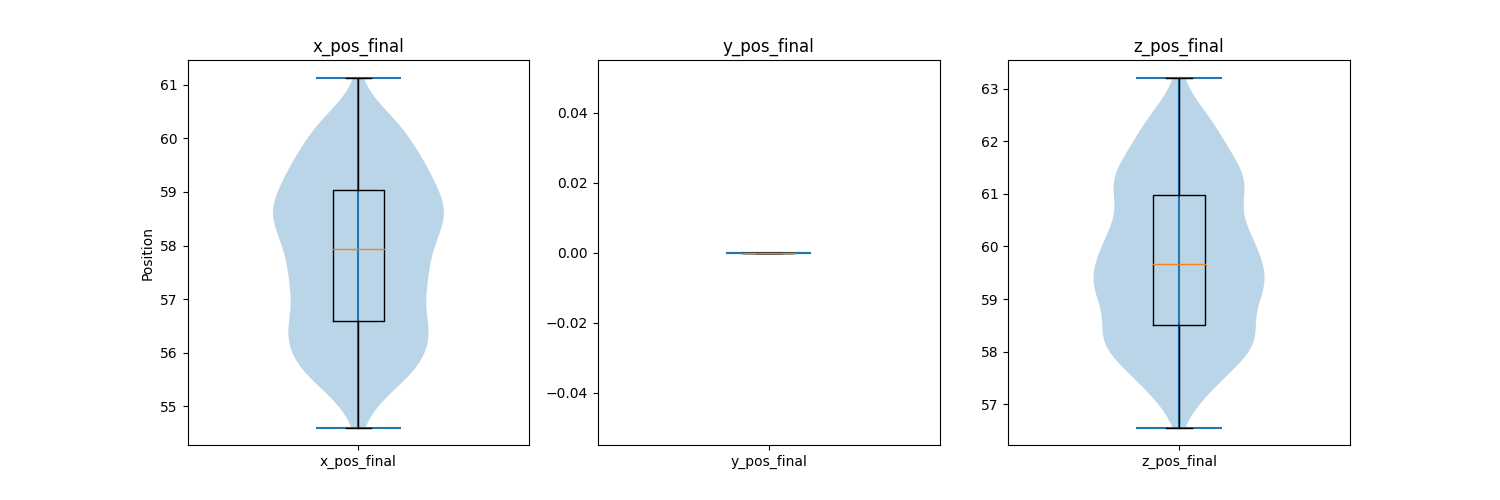

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

final_data = recs.get_data(scalars)

x_pos_final = [x["x_pos_final"]["value"] for x in final_data.values()]
y_pos_final = [x["y_pos_final"]["value"] for x in final_data.values()]
z_pos_final = [x["z_pos_final"]["value"] for x in final_data.values()]


ax[0].violinplot(x_pos_final)
ax[0].boxplot(x_pos_final)
ax[1].violinplot(y_pos_final)
ax[1].boxplot(y_pos_final)
ax[2].violinplot(z_pos_final)
ax[2].boxplot(z_pos_final)

ax[0].set_title("x_pos_final")
ax[0].set_ylabel("Position")
ax[0].set_xticklabels(["x_pos_final"])

ax[1].set_title("y_pos_final")
ax[1].set_xticklabels(["y_pos_final"])

ax[2].set_title("z_pos_final")
ax[2].set_xticklabels(["z_pos_final"])

fig.savefig("./images/QoIs_violin_box.png")

# QoI point data violin and box convergence plots

<IPython.core.display.Javascript object>


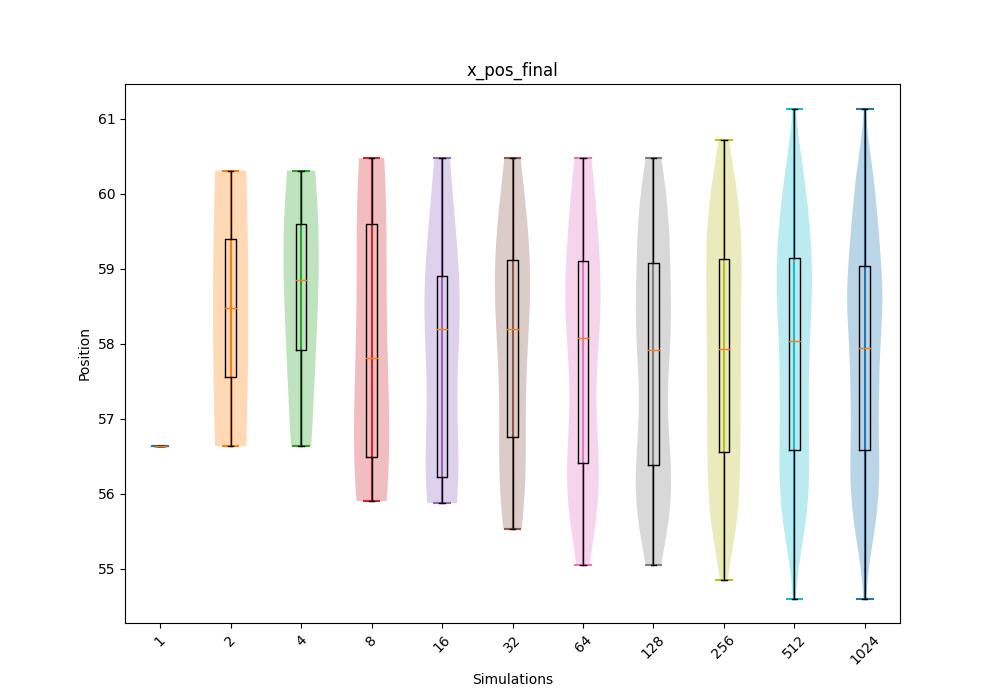

<IPython.core.display.Javascript object>


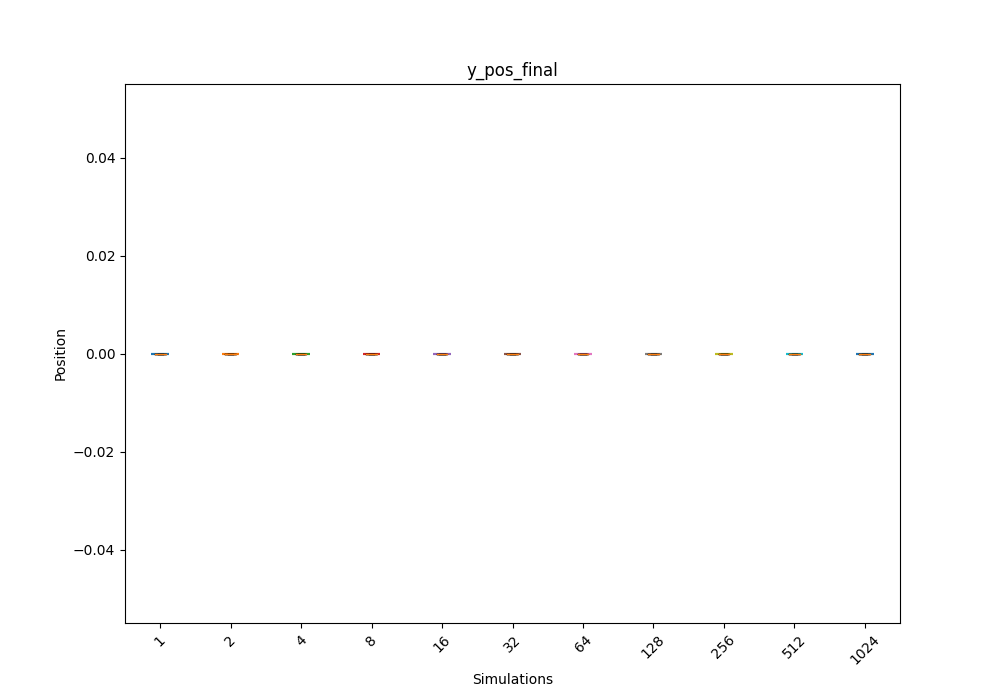

<IPython.core.display.Javascript object>


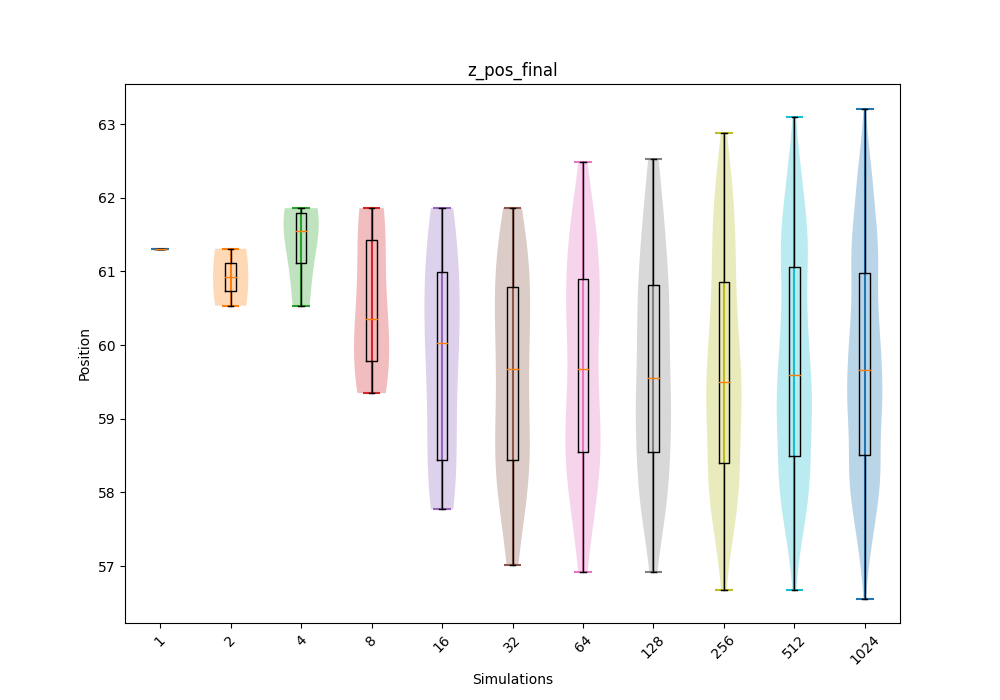

In [9]:
for scalar in scalars:
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))  
        
    for i, runs in enumerate(convergence):
        convergence_ids = [ "09cd18_"+str(x+1) for x in range(runs)]
    #     print(convergence_ids)


        if runs == convergence[-1]: # will error if all ids are present
            final_data = recs.get_data(scalars)
        else:
            final_data = recs.get_data(scalars,id_list=convergence_ids)



        scalar_values = [x[scalar]["value"] for x in final_data.values()]

        ax.violinplot(scalar_values, positions = [i])
        ax.boxplot(scalar_values, positions = [i])

    ax.set_title(scalar)
    ax.set_xlabel("Simulations")
    ax.set_ylabel("Position")
    ax.set_xticklabels(convergence, rotation = 45)

    fig.savefig(f"./images/QoIs_{scalar}_violin_box_convergence.png")

# QoI point data PDF and CDF plots

<IPython.core.display.Javascript object>


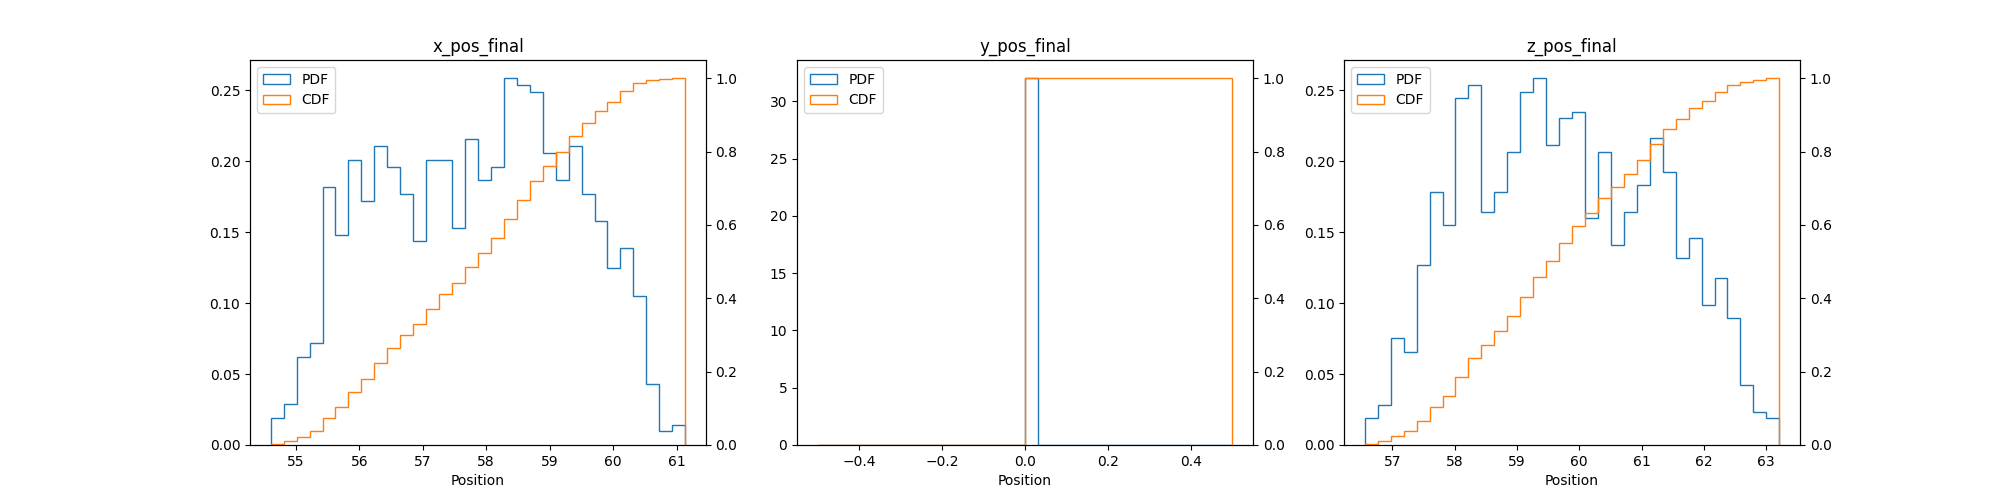

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax1 = []
ax1.append(ax[0].twinx())
ax1.append(ax[1].twinx())
ax1.append(ax[2].twinx())
# _ = vis.create_histogram(fig=fig, ax=ax[0],x="x_pos_final")
# _ = vis.create_histogram(fig=fig, ax=ax[1],x="y_pos_final")
# _ = vis.create_histogram(fig=fig, ax=ax[2],x="z_pos_final")
    
final_data = recs.get_data(scalars)

x_pos_final = [x["x_pos_final"]["value"] for x in final_data.values()]
y_pos_final = [x["y_pos_final"]["value"] for x in final_data.values()]
z_pos_final = [x["z_pos_final"]["value"] for x in final_data.values()]

ax[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, label = 'PDF')
ax1[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, color = colors[1], label = 'CDF')

ax[0].set_title("x_pos_final")
ax[0].set_xlabel("Position")
lines, labels = ax[0].get_legend_handles_labels()
lines2, labels2 = ax1[0].get_legend_handles_labels()
ax[0].legend(lines + lines2, labels + labels2, loc='upper left')


ax[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True)
ax1[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, color = colors[1])

ax[1].set_title("y_pos_final")
ax[1].set_xlabel("Position")
ax[1].legend(lines + lines2, labels + labels2, loc='upper left')


ax[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True)
ax1[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, color = colors[1])

ax[2].set_title("z_pos_final")
ax[2].set_xlabel("Position")
ax[2].legend(lines + lines2, labels + labels2, loc='upper left')

fig.savefig("./images/QoIs_pdf_cdf.png")

# QoI point data PDF and CDF convergence plots

<IPython.core.display.Javascript object>


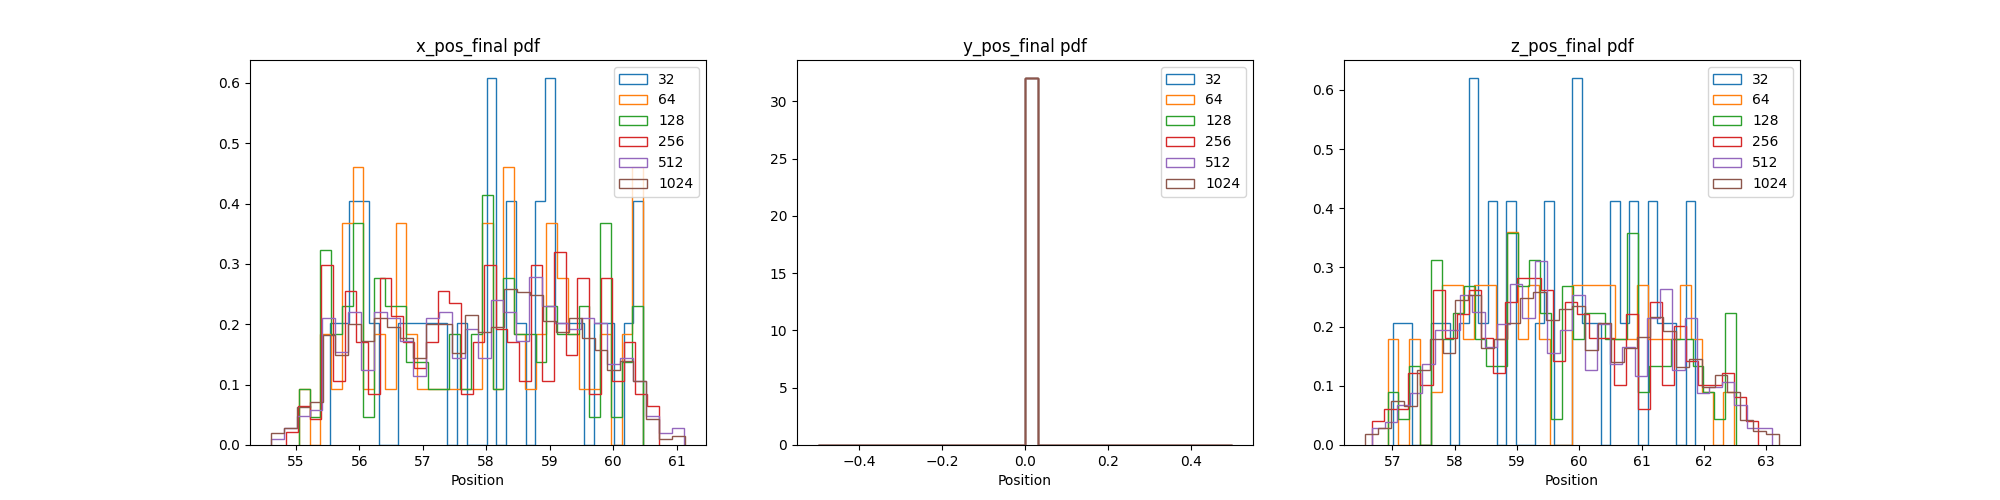

<IPython.core.display.Javascript object>


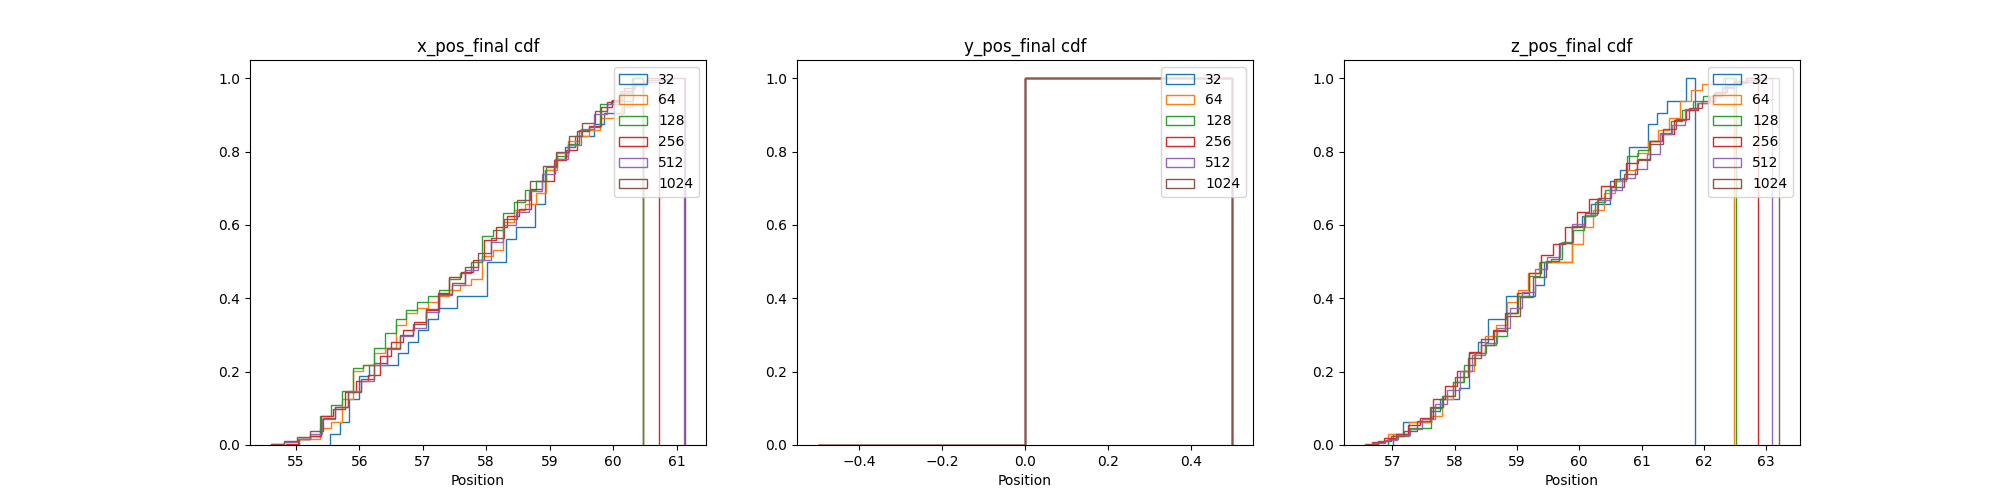

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig1, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# _ = vis.create_histogram(fig=fig, ax=ax[0],x="x_pos_final")
# _ = vis.create_histogram(fig=fig, ax=ax[1],x="y_pos_final")
# _ = vis.create_histogram(fig=fig, ax=ax[2],x="z_pos_final")

for i, runs in enumerate(convergence[5:]): # depending on number of runs, can obscure the rest 
    convergence_ids = [ "09cd18_"+str(x+1) for x in range(runs)]
#     print(convergence_ids)
    
    
    if runs == convergence[-1]: # will error if all ids are present
        final_data = recs.get_data(scalars)
    else:
        final_data = recs.get_data(scalars,id_list=convergence_ids)

    x_pos_final = [x["x_pos_final"]["value"] for x in final_data.values()]
    y_pos_final = [x["y_pos_final"]["value"] for x in final_data.values()]
    z_pos_final = [x["z_pos_final"]["value"] for x in final_data.values()]

    
    ax[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, label = runs)
    ax[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True, label = runs)
    ax[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True, label = runs)    
    
    ax1[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, label = runs)
    ax1[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, label = runs)
    ax1[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, label = runs)   
    
    
ax[0].set_title("x_pos_final pdf")
ax[0].set_xlabel("Position")
ax[0].legend()

ax[1].set_title("y_pos_final pdf")
ax[1].set_xlabel("Position")
ax[1].legend()

ax[2].set_title("z_pos_final pdf")
ax[2].set_xlabel("Position")
ax[2].legend()

fig.savefig("./images/QoIs_pdf_convergence.png")


ax1[0].set_title("x_pos_final cdf")
ax1[0].set_xlabel("Position")
ax1[0].legend()

ax1[1].set_title("y_pos_final cdf")
ax1[1].set_xlabel("Position")
ax1[1].legend()

ax1[2].set_title("z_pos_final cdf")
ax1[2].set_xlabel("Position")
ax1[2].legend()

fig1.savefig("./images/QoIs_cdf_convergence.png")

# QoI point data parameter correlation scatter plots

Negative correlation because bouncing off the wall quicker if your further out or faster

/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy

<IPython.core.display.Javascript object>


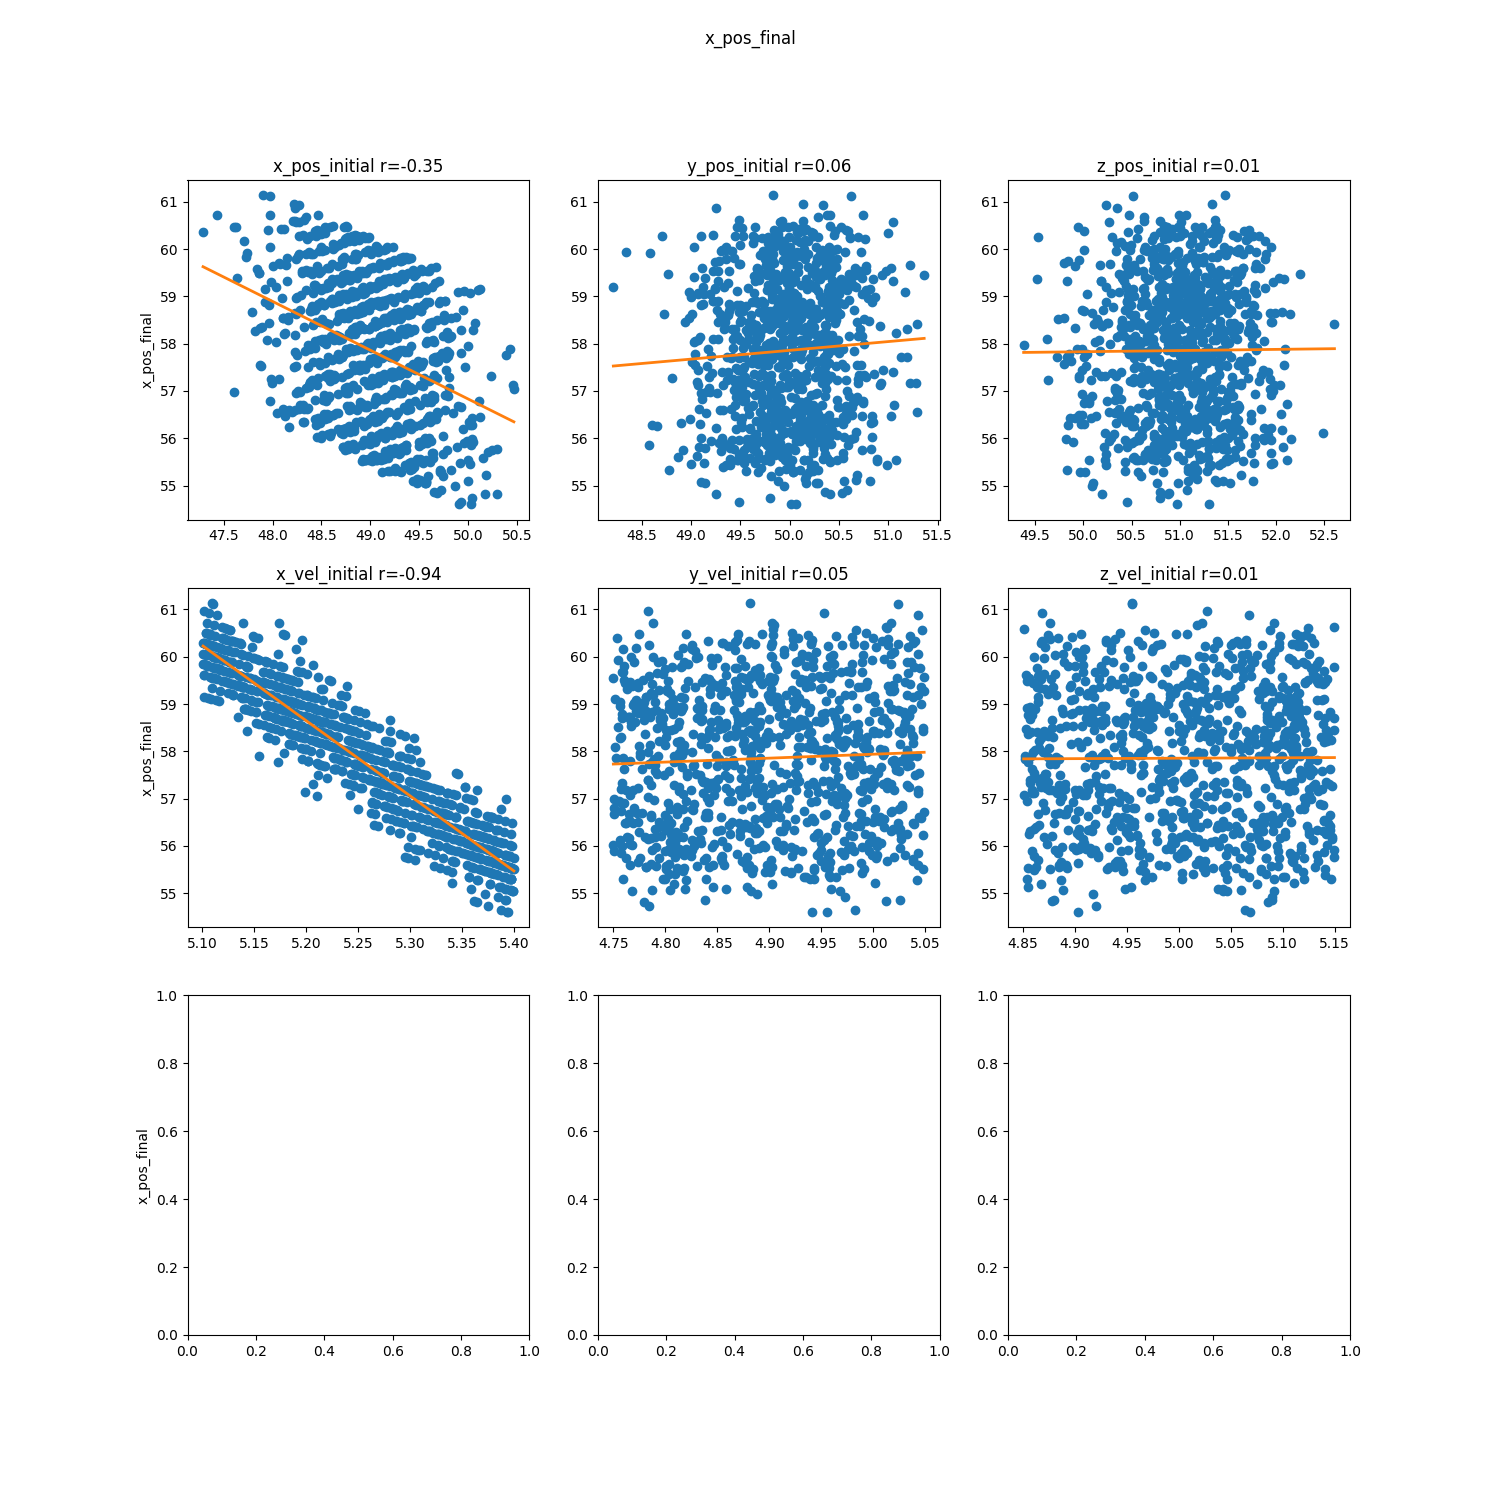

-1.0315901465300648 -0.35374509178686503
0.18553450146644154 0.05964500316688406
0.024646044384440905 0.008405940102278854
-15.89116759264211 -0.9383438804503842
0.8320809895726667 0.046955881141369234
0.09043273851223618 0.005231743397069707


<IPython.core.display.Javascript object>


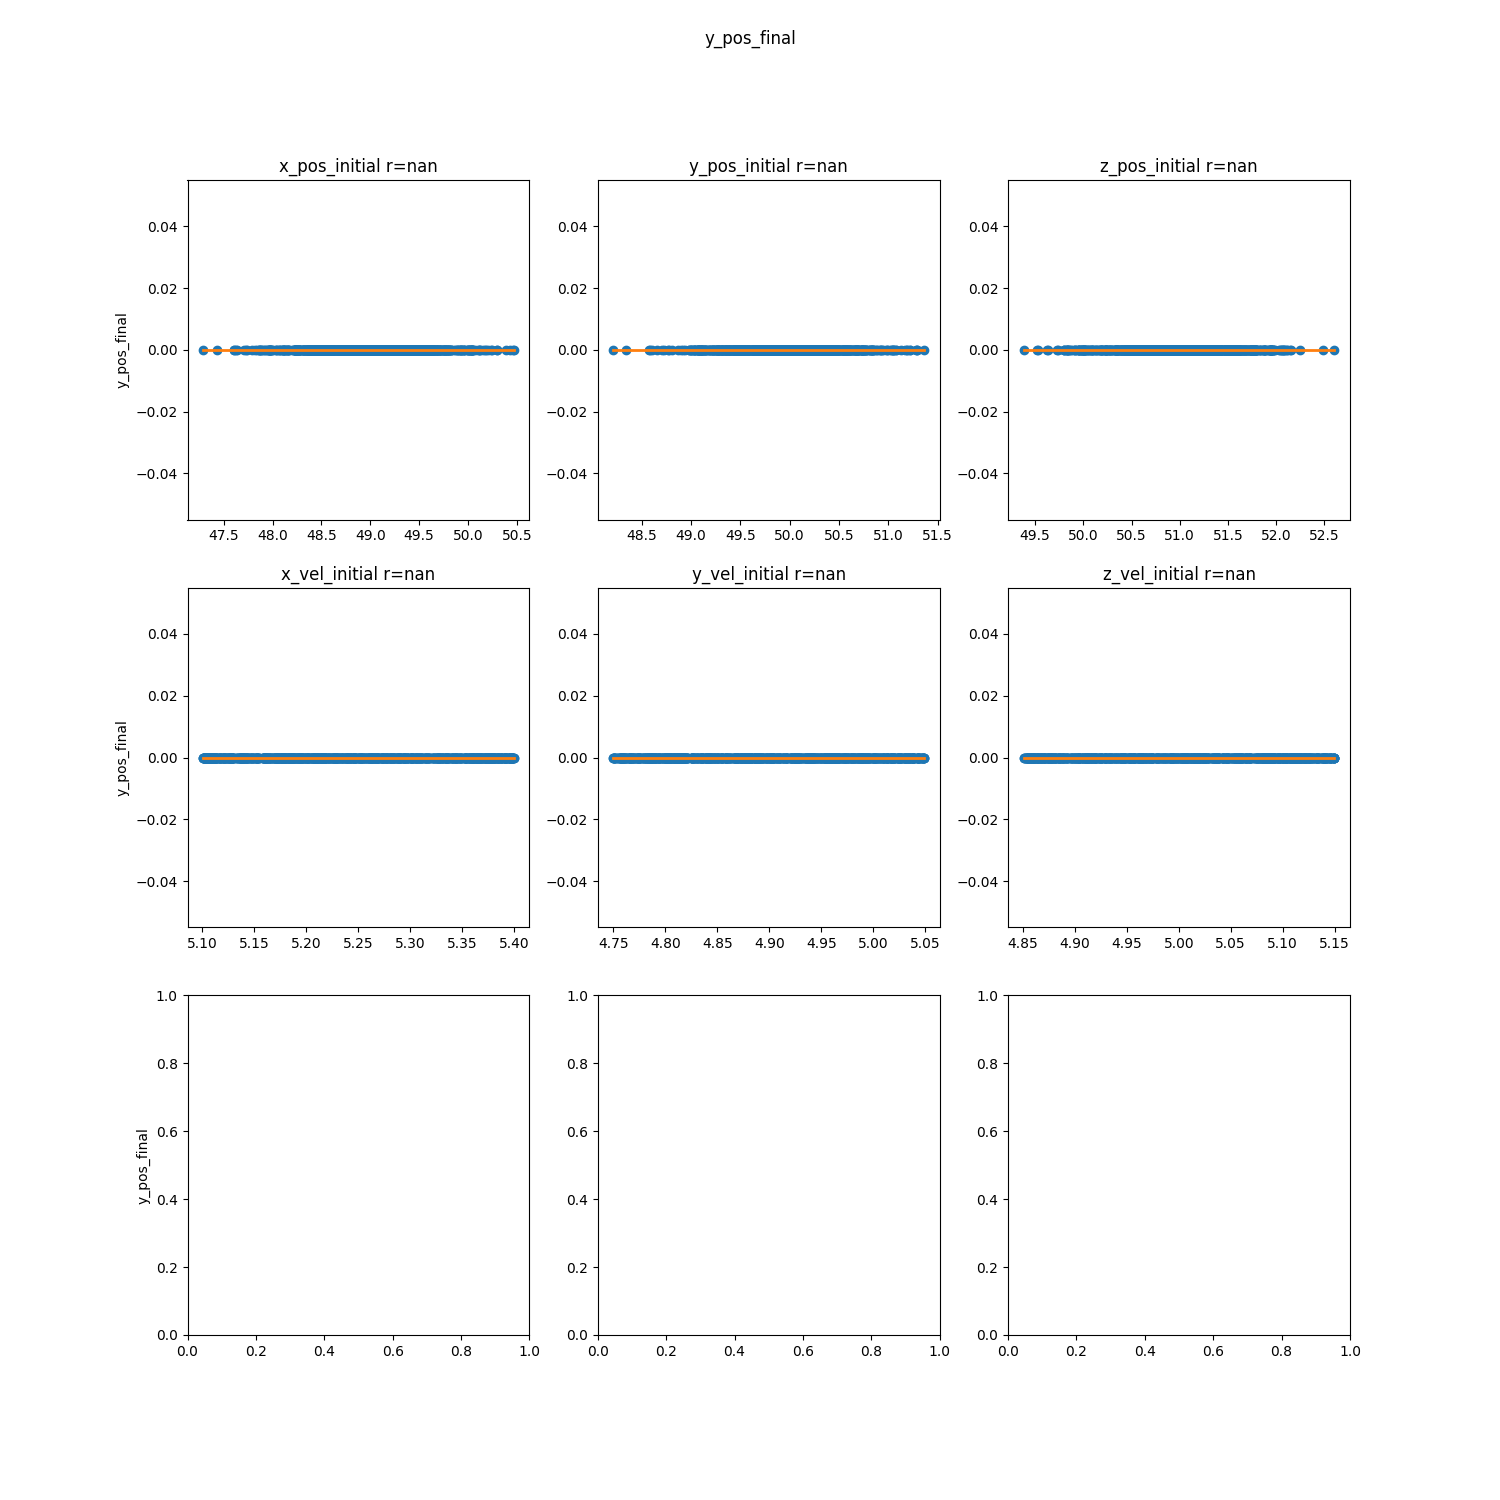

/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib64/python3.6/site-packages/numpy/lib/fun

0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan


<IPython.core.display.Javascript object>


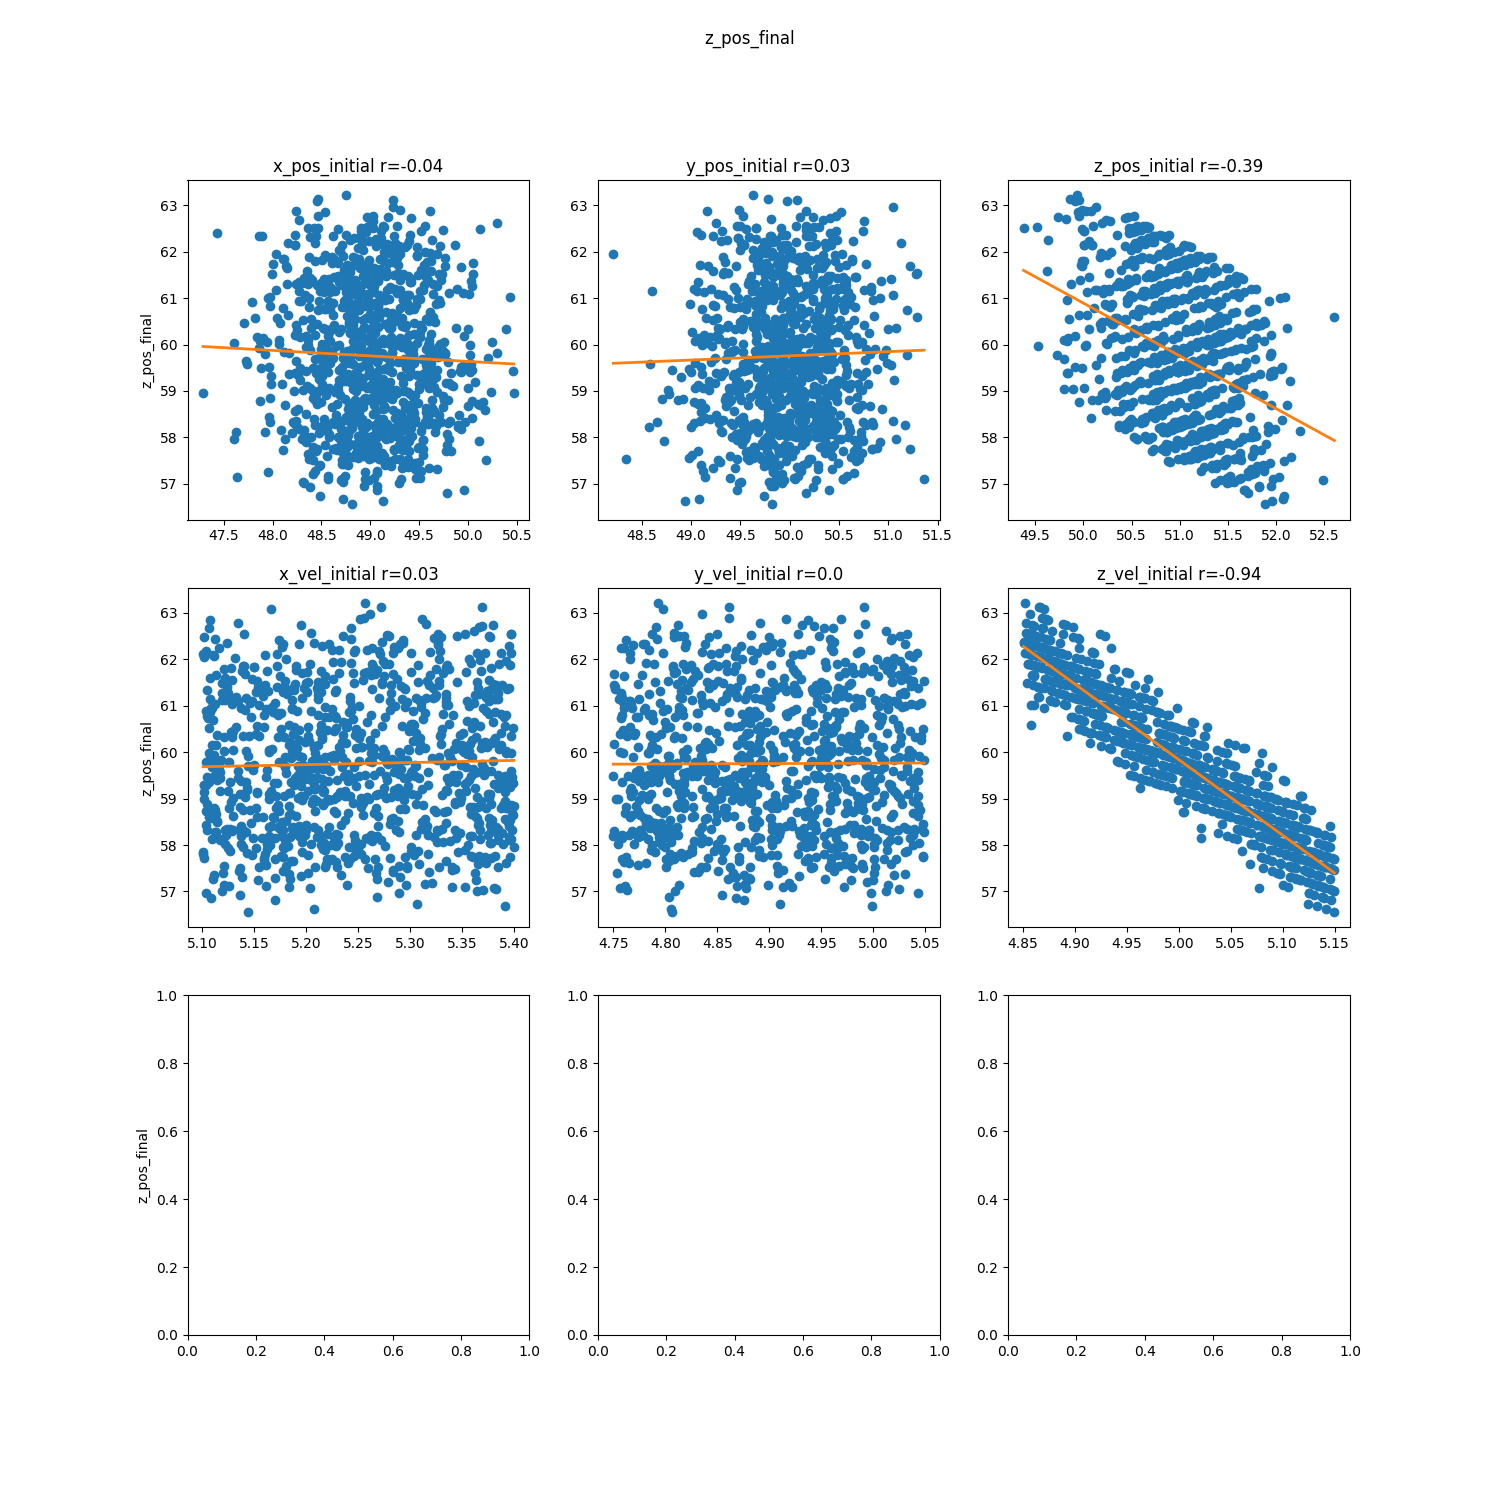

-0.11857387831238214 -0.040585066792982016
0.09002060951413349 0.028885862261189922
-1.1371132121955858 -0.38711212377675525
0.45534654556444837 0.02683751294275608
0.08354182536920801 0.004705679642576811
-16.27591160037341 -0.9398533144196997


In [11]:
num_plts = len(parameters)
rows_cols = math.ceil(math.sqrt(num_plts))

all_scalars = scalars + parameters


corrcoefs = {}

for i, runs in enumerate(convergence): # depending on number of runs, can obscure the rest 
    convergence_ids = [ "09cd18_"+str(x+1) for x in range(runs)]
#     print(convergence_ids)
    
    
    if runs == convergence[-1]: # will error if all ids are present
        final_data = recs.get_data(all_scalars)
    else:
        final_data = recs.get_data(all_scalars,id_list=convergence_ids)
        
    corrcoefs[runs] = {}
    for scalar in scalars:

        if runs == convergence[-1]: # Just plot the last set of simulations
            fig, ax = plt.subplots(nrows=rows_cols, ncols=rows_cols, figsize=(rows_cols*5, rows_cols*5))

            fig.suptitle(scalar)


            i=0
            j=0
            ax[j,i].set_ylabel(scalar)
        
        scalar_values = [x[scalar]["value"] for x in final_data.values()]
        corrcoefs[runs][scalar] = {}
        for parameter in parameters:

            parameter_values = [x[parameter]["value"] for x in final_data.values()]

 
            r = np.corrcoef(parameter_values, scalar_values)[0,1]
            corrcoefs[runs][scalar][parameter] = r
        
        
            if runs == convergence[-1]: # Just plot the last set of simulations  
                m, b = np.polyfit(parameter_values, scalar_values, 1)
                print(m,r)   
                x = np.linspace(min(parameter_values),max(parameter_values))
                y = m*x+b

#                 slope, intercept, r, p, se = stats.linregress(x, y)

                ax[j,i].scatter(parameter_values, scalar_values)
                ax[j,i].plot(x, y, color = colors[1], linewidth=2.0)
                ax[j,i].set_title(f"{parameter} r={round(r,2)}")

                if i == rows_cols-1:
                    i = 0
                    j += 1
                    ax[j,i].set_ylabel(scalar)
                else:
                    i += 1
        if runs == convergence[-1]: # Just plot the last set of simulations
            fig.savefig(f"./images/QoIs_{scalar}_correlation.png")


# QoI point data parameter correlation heatmaps

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-0.35374509         nan -0.04058507]
 [ 0.059645           nan  0.02888586]
 [ 0.00840594         nan -0.38711212]
 [-0.93834388         nan  0.02683751]
 [ 0.04695588         nan  0.00470568]
 [ 0.00523174         nan -0.93985331]]


<IPython.core.display.Javascript object>


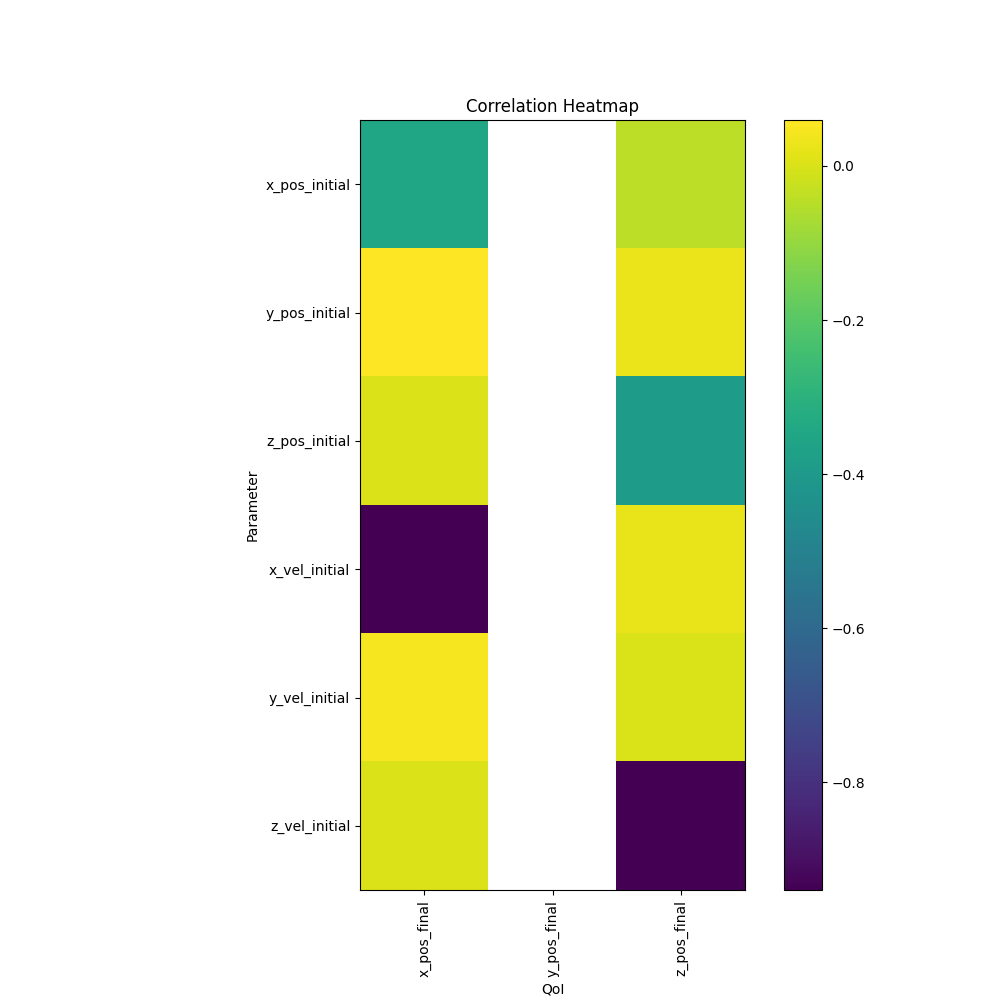

In [14]:
# print(corrcoefs)

i=0
j=0
test=np.zeros((len(parameters),len(scalars)))

print(test)

for scalar in scalars:
    for parameter in parameters:

        test[i,j] = corrcoefs[convergence[-1]][scalar][parameter]
        i+=1
    i=0
    j+=1

        
        
print(test)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
im = ax.imshow(test)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_title("Correlation Heatmap")

ax.set_xlabel("QoI")
ax.set_xticks(np.arange(len(scalars)))
ax.set_xticklabels(scalars, rotation=90, ha='center', minor=False)

ax.set_ylabel("Parameter")
ax.set_yticks(np.arange(len(parameters)))
ax.set_yticklabels(parameters, minor=False)


fig.savefig('./images/QoIs_correlation_heatmap')


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[        nan -1.          0.05877079 -0.42025145 -0.37740758 -0.39057584
  -0.42696915 -0.32622906 -0.35486313 -0.40534024 -0.35374509]
 [        nan -1.         -0.10453744 -0.18485052  0.18200034  0.16498019
   0.23782452  0.06190948  0.11307041  0.05403213  0.059645  ]
 [        nan  1.          0.44597612  0.22278663 -0.05575091 -0.00643754
  -0.0627661   0.09059907  0.0359404   0.00528153  0.00840594]
 [        nan -1.         -0.94372323 -0.94308632 -0.93919229 -0.92078742
  -0.93178173 -0.93978746 -0.94100551 -0.93829629 -0.93834388]
 [        nan -1.         -0.29701466 -0.28348481  0.17540117  0.25216206
   0.2490036   0.17160519  0.07968262  0.05129554  0.04695588]
 [        nan  1.          0.25974456 -0.14571325 -0.15509649 -0.24299507
  -0.14262869 -0.1357015

<IPython.core.display.Javascript object>


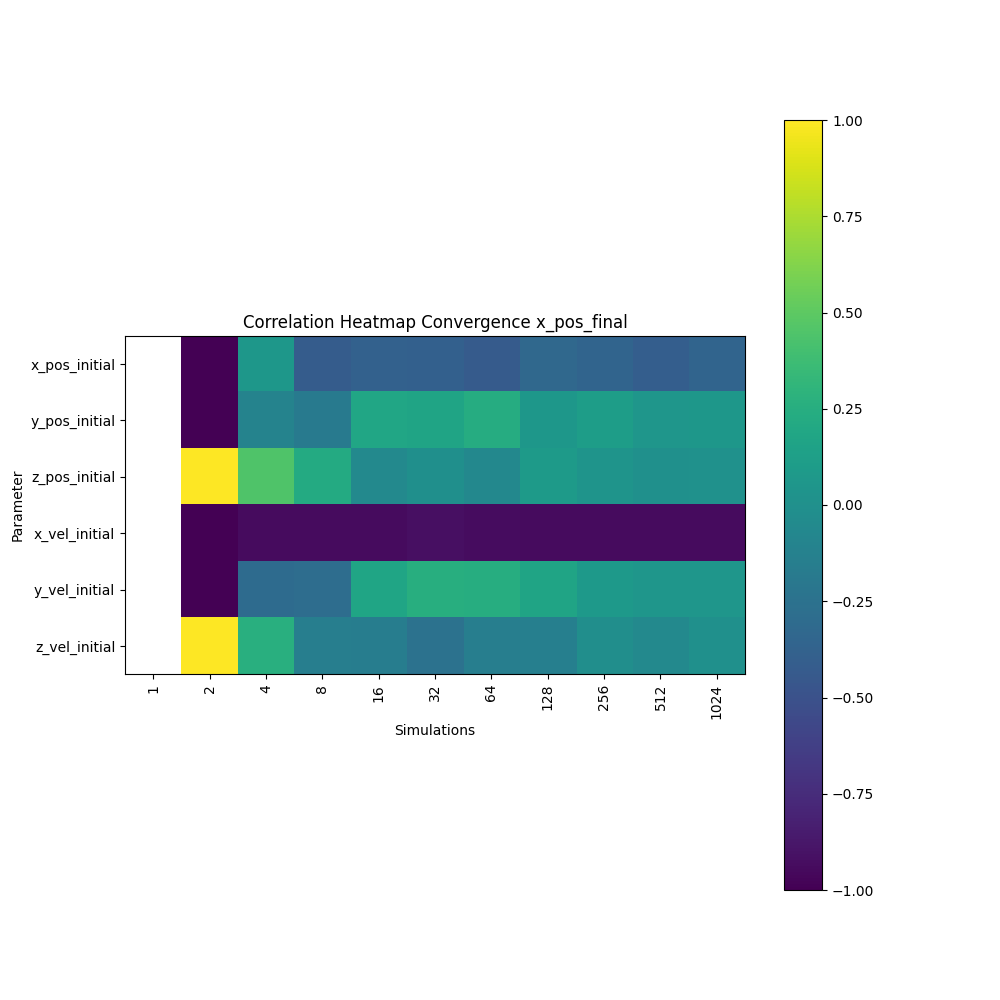

[[nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]]


<IPython.core.display.Javascript object>


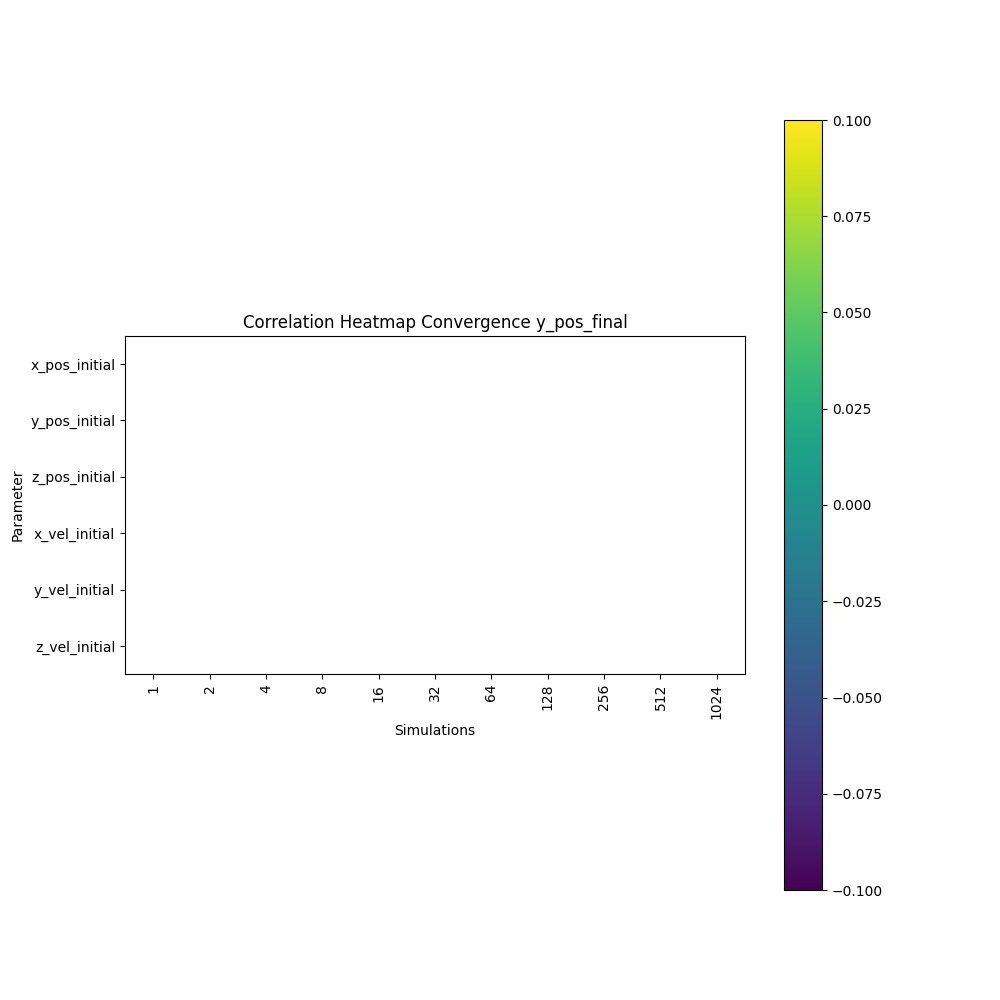

[[        nan  1.          0.83942154 -0.04203789 -0.21047893  0.04081156
   0.10205443 -0.03678844 -0.04649813 -0.06380083 -0.04058507]
 [        nan  1.          0.65019663 -0.02201493 -0.21565646 -0.15758603
  -0.0703419  -0.11630246 -0.04533198  0.00989942  0.02888586]
 [        nan -1.         -0.88147729 -0.24348206 -0.37759642 -0.38406975
  -0.27704673 -0.32195727 -0.39292459 -0.39589365 -0.38711212]
 [        nan  1.          0.05667206 -0.05531502 -0.10822954 -0.25804059
  -0.20585203 -0.08117069  0.01765219 -0.02913766  0.02683751]
 [        nan  1.          0.45694901  0.16870817  0.26424167  0.07896997
   0.04201396 -0.0908635  -0.02324374 -0.00953187  0.00470568]
 [        nan -1.         -0.89576384 -0.93486391 -0.95451991 -0.94185666
  -0.94585023 -0.94297967 -0.94612629 -0.94162436 -0.93985331]]


<IPython.core.display.Javascript object>


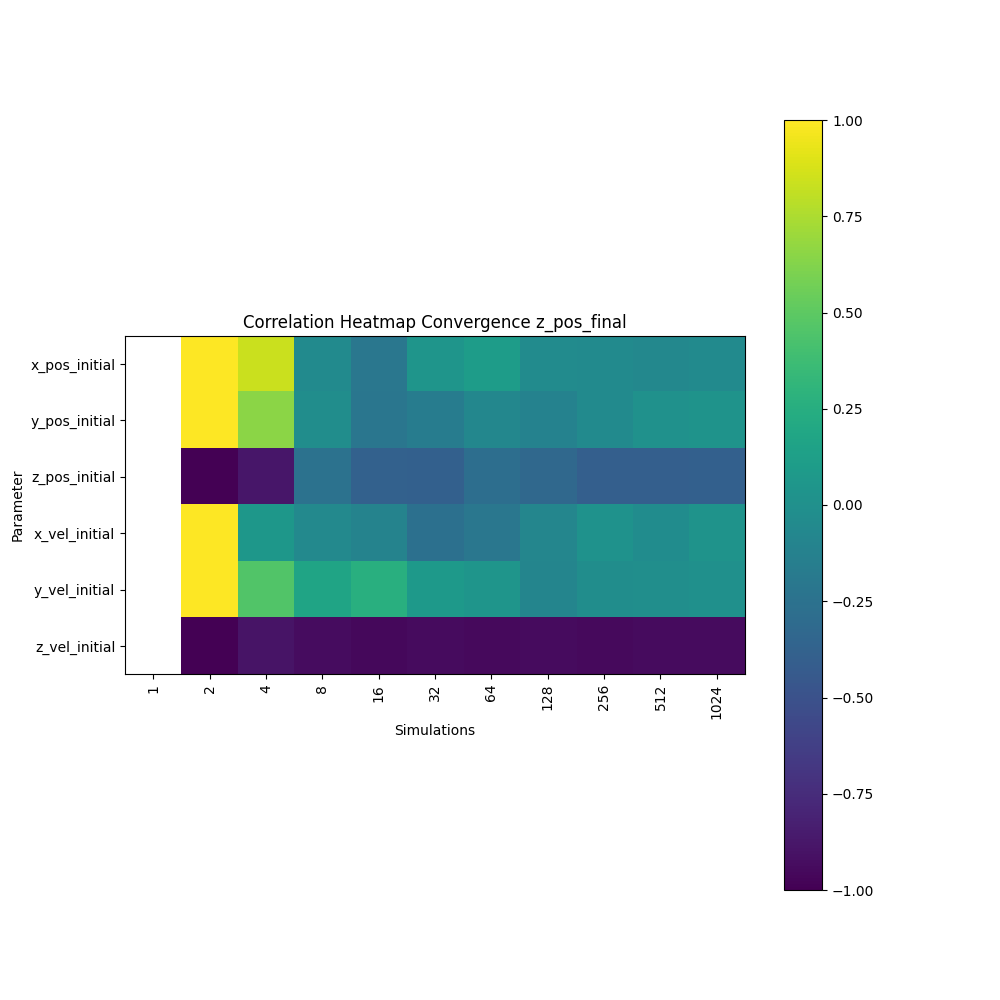

In [19]:
# print(corrcoefs)

i=0
j=0
test=np.zeros((len(parameters),len(convergence)))
print(test)

for scalar in scalars:
    for runs in convergence: 
        for parameter in parameters:

            test[i,j] = corrcoefs[runs][scalar][parameter]
            i+=1
        i=0
        j+=1
    i=0
    j=0
        
        
        
    print(test)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    im = ax.imshow(test)
    cbar = ax.figure.colorbar(im, ax=ax)

    ax.set_title(f"Correlation Heatmap Convergence {scalar}")

    ax.set_xlabel("Simulations")
    ax.set_xticks(np.arange(len(convergence)))
    ax.set_xticklabels(convergence, rotation=90, ha='center', minor=False)

    ax.set_ylabel("Parameter")
    ax.set_yticks(np.arange(len(parameters)))
    ax.set_yticklabels(parameters, minor=False)


    fig.savefig(f'./images/QoIs_{scalar}_correlation_heatmap_convergence')


# Adding up the uncertainties

## Adding common timestep data to Ensembles

In [12]:
# Numerical Resolution
# Be sure to run 01_baseline_simulation/num_res/visualization_num_res.ipynb to acquire necessary data
mean_num_res = recs_num_res.get('mean')
time_num_res = mean_num_res.data['time_common']['value']

# Ensembles
mean = recs.get('mean')
time = mean.data['time']['value']
x_pos_mean = mean.data['x_pos_mean']['value']
y_pos_mean = mean.data['y_pos_mean']['value']
z_pos_mean = mean.data['z_pos_mean']['value']
x_pos_std = mean.data['x_pos_std']['value']
y_pos_std = mean.data['y_pos_std']['value']
z_pos_std = mean.data['z_pos_std']['value']


x_pos_mean_common = []
y_pos_mean_common = []
z_pos_mean_common = []
x_pos_std_common = []
y_pos_std_common = []
z_pos_std_common = []
time_common = []

for i, t in enumerate(time):
    for t2 in time_num_res:
        if t == t2:
            x_pos_mean_common.append(x_pos_mean[i])
            y_pos_mean_common.append(y_pos_mean[i])
            z_pos_mean_common.append(z_pos_mean[i])
            x_pos_std_common.append(x_pos_std[i])
            y_pos_std_common.append(y_pos_std[i])
            z_pos_std_common.append(z_pos_std[i])
            time_common.append(time[i])


mean.add_data('time_common',time_common)
mean.add_data('x_pos_mean_common',x_pos_mean_common)
mean.add_data('y_pos_mean_common',y_pos_mean_common)
mean.add_data('z_pos_mean_common',z_pos_mean_common)
mean.add_data('x_pos_std_common',x_pos_std_common)
mean.add_data('y_pos_std_common',y_pos_std_common)
mean.add_data('z_pos_std_common',z_pos_std_common)


recs.update(mean) # need to update or else won't save!!!!!



## Calculating Validation Uncertainty

In [59]:
# Numerical Resolution: Numerical Uncertainty (u_num)
# Be sure to run 01_baseline_simulation/num_res/visualization_num_res.ipynb to acquire necessary data
x_pos_std_num_res = mean_num_res.data['x_pos_std']['value']
y_pos_std_num_res = mean_num_res.data['y_pos_std']['value']
z_pos_std_num_res = mean_num_res.data['z_pos_std']['value']

# Ensembles: Input Uncertainty (u_input)
x_pos_mean_common = mean.data['x_pos_mean_common']['value']
x_pos_mean_common = mean.data['x_pos_mean_common']['value']
y_pos_mean_common = mean.data['y_pos_mean_common']['value']
z_pos_mean_common = mean.data['z_pos_mean_common']['value']
x_pos_std_common = mean.data['x_pos_std_common']['value']
y_pos_std_common = mean.data['y_pos_std_common']['value']
z_pos_std_common = mean.data['z_pos_std_common']['value']

# Experiment: Experimental Uncertainty (u_D)
u_D_x = [statistics.mean([x,y]) for x, y in zip(x_pos_std_num_res,x_pos_std_common)]
u_D_y = [statistics.mean([x,y]) for x, y in zip(y_pos_std_num_res,y_pos_std_common)]
u_D_z = [statistics.mean([x,y]) for x, y in zip(z_pos_std_num_res,z_pos_std_common)]

# print(max(x_pos_std_num_res))
# print(max(y_pos_std_num_res))
# print(max(z_pos_std_num_res))

# print(max(x_pos_std_common))
# print(max(y_pos_std_common))
# print(max(z_pos_std_common))

# print(u_D_x)
# print(u_D_y)
# print(u_D_z)

# Validation Uncertainty (u_val)
u_val_x = np.sqrt(np.square(x_pos_std_num_res)+np.square(x_pos_std_common)+np.square(u_D_x))
u_val_y = np.sqrt(np.square(y_pos_std_num_res)+np.square(y_pos_std_common)+np.square(u_D_y))
u_val_z = np.sqrt(np.square(z_pos_std_num_res)+np.square(z_pos_std_common)+np.square(u_D_z))

[0.2913735085522582, 0.2914185397036487, 0.2913925575020519, 0.2912929021990459, 0.2911160439934224, 0.29085768015324465, 0.2905128390256926, 0.2900759877146403, 0.28954114037019074, 0.288901964340181, 0.2881518818588443, 0.2872841655238491, 0.2862920269927158, 0.2851687066913438, 0.285082092090488, 0.2938122861903253, 0.30301991960046065, 0.31269163550490486, 0.32281475770930995, 0.3333769945655645, 0.3443664494154641, 0.3557716302295587, 0.3675814546931245, 0.3797852509592909, 0.39237275468425015, 0.40533410298400396, 0.4186598259079479, 0.43234083596275186, 0.44636841615462464, 0.4607342069541243, 0.4754301925274224, 0.4904486865227532, 0.5057823176511795, 0.5214240152567773, 0.5373669950329417, 0.5536047450083565, 0.5701310118979415, 0.5869397878900665, 0.6040252979214364, 0.6213819874744099, 0.6390045109180502, 0.6568877204032133, 0.675026655313109, 0.6934165322640327, 0.712052735645498, 0.730930808684947, 0.7500464450193086, 0.7693954807535199, 0.7889738869848082, 0.8087777627706

## Plotting Validation Uncertainty

<IPython.core.display.Javascript object>


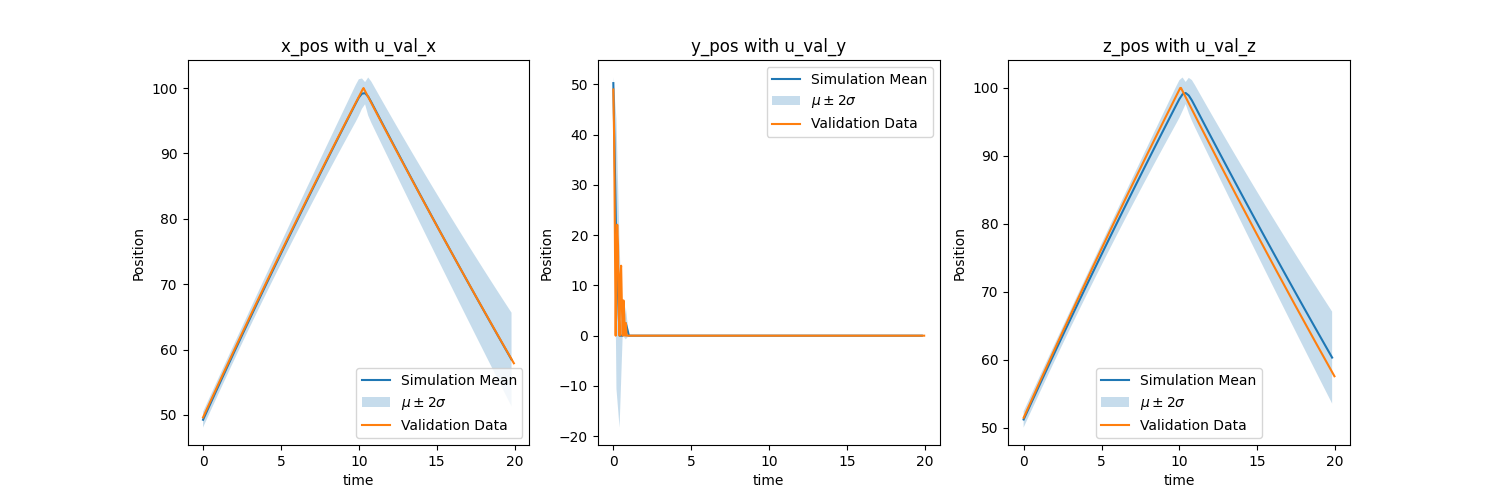

In [58]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))



ax[0].plot(time_common, x_pos_mean_common)
ax[1].plot(time_common, y_pos_mean_common)
ax[2].plot(time_common, z_pos_mean_common)

ax[0].fill_between(time_common,x_pos_mean_common+2*u_val_x,x_pos_mean_common-2*u_val_x, alpha=0.25)
ax[1].fill_between(time_common,y_pos_mean_common+2*u_val_y,y_pos_mean_common-2*u_val_y, alpha=0.25)
ax[2].fill_between(time_common,z_pos_mean_common+2*u_val_z,z_pos_mean_common-2*u_val_z, alpha=0.25)



ax[0].plot(time_true, x_true)
ax[1].plot(time_true, y_true)
ax[2].plot(time_true, z_true)

ax[0].set_title("x_pos with u_val_x")
ax[1].set_title("y_pos with u_val_y")
ax[2].set_title("z_pos with u_val_z")

ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

ax[0].set_ylabel("Position")
ax[1].set_ylabel("Position")
ax[2].set_ylabel("Position")


ax[0].legend(labels=['Simulation Mean','$\mu \pm 2 \sigma$','Validation Data'])
ax[1].legend(labels=['Simulation Mean','$\mu \pm 2 \sigma$','Validation Data'])
ax[2].legend(labels=['Simulation Mean','$\mu \pm 2 \sigma$','Validation Data'])
fig.savefig("./images/QoIs_u_val.png")

# Quantification of Margins and Uncertainties (QMU)

/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<IPython.core.display.Javascript object>


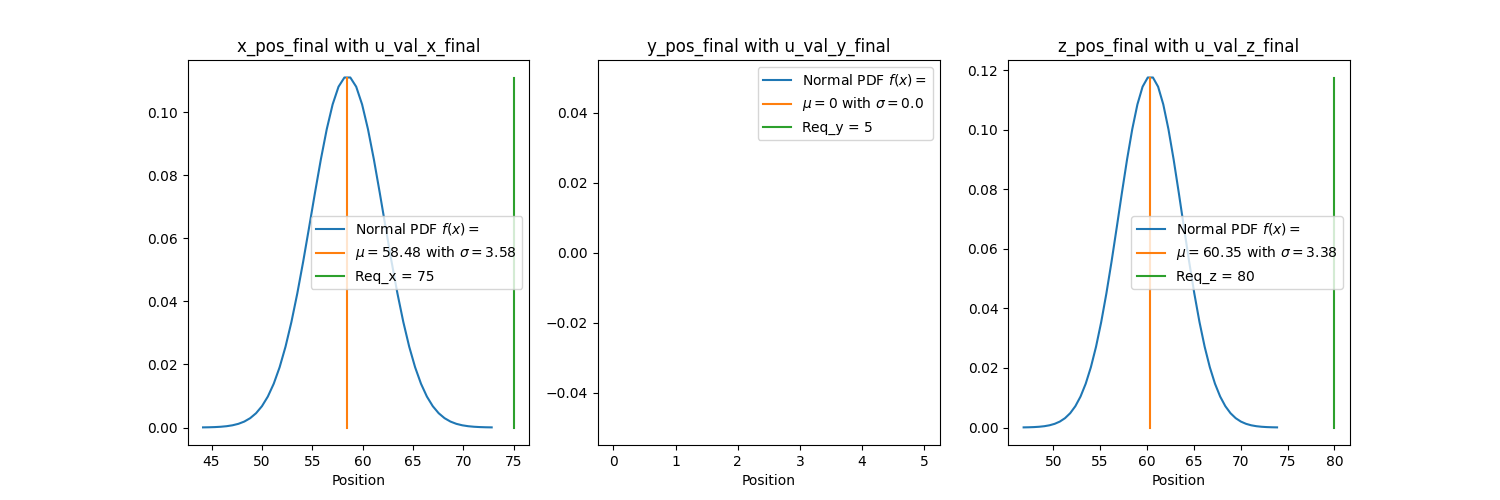

4.614835035030048 inf 5.81182684690029


/g/g20/moreno45/Projects/WEAVE/weave_demos/ball_bounce/ball_bounce_demo_venv/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


In [65]:

x_list = np.linspace(x_pos_mean_common[-1]-4*u_val_x[-1],x_pos_mean_common[-1]+4*u_val_x[-1])
x_dist =  1/( np.sqrt(2 * np.pi * u_val_x[-1]**2)) * np.exp( - (x_list - x_pos_mean_common[-1])**2 / (2 * u_val_x[-1]**2) )

y_list = np.linspace(y_pos_mean_common[-1]-4*u_val_y[-1],y_pos_mean_common[-1]+4*u_val_y[-1])
y_dist =  1/( np.sqrt(2 * np.pi * u_val_y[-1]**2)) * np.exp( - (y_list - y_pos_mean_common[-1])**2 / (2 * u_val_y[-1]**2) )

z_list = np.linspace(z_pos_mean_common[-1]-4*u_val_z[-1],z_pos_mean_common[-1]+4*u_val_z[-1])
z_dist =  1/( np.sqrt(2 * np.pi * u_val_z[-1]**2)) * np.exp( - (z_list - z_pos_mean_common[-1])**2 / (2 * u_val_z[-1]**2) )



fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))



ax[0].plot(x_list, x_dist, label = 'Normal PDF $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}}$')
ax[1].plot(y_list, y_dist, label = 'Normal PDF $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}}$')
ax[2].plot(z_list, z_dist, label = 'Normal PDF $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}}$')

ax[0].plot([x_pos_mean_common[-1],x_pos_mean_common[-1]], [0, max(x_dist)], label = f'$\mu=${round(x_pos_mean_common[-1],2)} with $\sigma=${round(u_val_x[-1],2)}')
ax[1].plot([y_pos_mean_common[-1],y_pos_mean_common[-1]], [0, max(y_dist)], label = f'$\mu=${round(y_pos_mean_common[-1],2)} with $\sigma=${round(u_val_y[-1],2)}')
ax[2].plot([z_pos_mean_common[-1],z_pos_mean_common[-1]], [0, max(z_dist)], label = f'$\mu=${round(z_pos_mean_common[-1],2)} with $\sigma=${round(u_val_z[-1],2)}')

Req_x = 75
Req_y = 5
Req_z = 80
ax[0].plot([Req_x,Req_x], [0, max(x_dist)], label = f'Req_x = {Req_x}')
ax[1].plot([Req_y,Req_y], [0, max(y_dist)], label = f'Req_y = {Req_y}')
ax[2].plot([Req_z,Req_z], [0, max(z_dist)], label = f'Req_z = {Req_z}')


ax[0].set_title("x_pos_final with u_val_x_final")
ax[1].set_title("y_pos_final with u_val_y_final")
ax[2].set_title("z_pos_final with u_val_z_final")

ax[0].set_xlabel("Position")
ax[1].set_xlabel("Position")
ax[2].set_xlabel("Position")

# ax[0].set_ylabel("Normal PDF")
# ax[1].set_ylabel("Normal PDF")
# ax[2].set_ylabel("Normal PDF")

ax[0].legend()
ax[1].legend()
ax[2].legend()
# ax[0].legend(labels=['Normal PDF','$\mu \pm 2 \sigma$','Validation Data'])
# ax[1].legend(labels=['Normal PDF','$\mu \pm 2 \sigma$','Validation Data'])
# ax[2].legend(labels=['Normal PDF','$\mu \pm 2 \sigma$','Validation Data'])

fig.savefig("./images/QoIs_QMU.png")

MF_x = (Req_x-x_pos_mean_common[-1])/u_val_x[-1]
MF_y = (Req_y-y_pos_mean_common[-1])/u_val_y[-1]
MF_z = (Req_z-z_pos_mean_common[-1])/u_val_z[-1]
print(MF_x, MF_y, MF_z)